<a href="https://colab.research.google.com/github/Judah04/Email_Analysis/blob/main/email_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chat.openai.com/c/c7f23e05-b29d-4f55-8138-029a280e16f9

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import mailbox
mboxfile = "/content/drive/MyDrive/All mail Including Spam and Trash.mbox"
mbox = mailbox.mbox(mboxfile)
mbox

In [6]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
X-Feedback-Id
X-Mailgun-Sending-Ip
X-Mailgun-Sid
Received
Sender
Date
Mime-Version
Content-Type
Subject
From
To
X-Mailgun-Tag
Reply-To
Message-Id


# Data Transformation

## Data Cleansing

In [7]:
import csv

with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['date'],
                         message['to'], message['X-Gmail-Labels'],
                         message['X-GM-THRID']
                        ])

## Loading the CSV

In [8]:
zen = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])
zen.head()

,subject,from,date,to,label,thread
0,subject,from,date,to,label,thread
1,Practice Coding with sWAP cASE,HackerRank Team <no-reply@hackerrankmail.com>,"Mon, 21 Aug 2023 12:54:11 +0000",judahabraham04@gmail.com,"Inbox,Category updates,Unread",1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,Encompass Well <encompasswellnigeria@gmail.com>,"Sun, 20 Aug 2023 18:43:15 +0100",undisclosed-recipients:;,"Inbox,Important,Category personal,Unread",1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,"Sun, 20 Aug 2023 12:55:32 +0000 (UTC)",Judah Abraham <judahabraham04@gmail.com>,"Inbox,Category updates,Unread",1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,"""Newegg Hot Deals"" <Promo@promo.newegg.com>",20 Aug 2023 15:37:23 +0000,"""judahabraham04@gmail.com"" <judahabraham04@gma...","Inbox,Category promotions,Unread",1774762951017777312


## Converting Date Column to DateTime Formt

In [9]:
zen.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [10]:
zen['date'] = zen['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


## Removing NaN values

In [11]:
zen = zen[zen['date'].notna()]

zen.to_csv('gmail.csv')

## Applying descriptive statistics

In [12]:
zen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16007 entries, 1 to 16007
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  15917 non-null  object             
 1   from     16007 non-null  object             
 2   date     16007 non-null  datetime64[ns, UTC]
 3   to       16005 non-null  object             
 4   label    16007 non-null  object             
 5   thread   16007 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 875.4+ KB


In [13]:
zen.head()

,subject,from,date,to,label,thread
1,Practice Coding with sWAP cASE,HackerRank Team <no-reply@hackerrankmail.com>,2023-08-21 12:54:11+00:00,judahabraham04@gmail.com,"Inbox,Category updates,Unread",1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,Encompass Well <encompasswellnigeria@gmail.com>,2023-08-20 17:43:15+00:00,undisclosed-recipients:;,"Inbox,Important,Category personal,Unread",1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2023-08-20 12:55:32+00:00,Judah Abraham <judahabraham04@gmail.com>,"Inbox,Category updates,Unread",1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,"""Newegg Hot Deals"" <Promo@promo.newegg.com>",2023-08-20 15:37:23+00:00,"""judahabraham04@gmail.com"" <judahabraham04@gma...","Inbox,Category promotions,Unread",1774762951017777312
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 14:41:30+00:00,judahabraham04@gmail.com,"Inbox,Category updates,Unread",1774741226405537399


## Data Refactoring

In [14]:
import re

def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

**import re:** This line imports the Python re module, which stands for regular expressions. Regular expressions are used to search, match, and manipulate strings based on specified patterns.

def extract_email_ID(string):: This line defines a function named extract_email_ID that takes a single argument, string, which is the input string from which the function will attempt to extract email addresses.

**email = re.findall(r'<(.+?)>', string):** This line uses the re.findall() function to search for all occurrences of a specific pattern within the string. The pattern r'<(.+?)>' is a regular expression that looks for text enclosed within angle brackets (< and >). The .+? inside the brackets captures one or more characters (the + indicates one or more occurrences, and the ? makes it non-greedy, so it captures the smallest possible matching sequence). This pattern assumes that email addresses are enclosed within angle brackets, like <example@email.com>.

**if not email::** This conditional statement checks if the email list is empty. If the re.findall() function did not find any matches (i.e., no email addresses were enclosed in angle brackets), the email list will be empty.

**email = list(filter(lambda y: '@' in y, string.split())):** If no email addresses were found within angle brackets, this line attempts to extract email addresses by splitting the string into words and filtering out the words that contain the "@" symbol, which is a common characteristic of email addresses. Here's how this line works:

**string.split():** This splits the string into a list of words based on whitespace.

**filter(lambda y: '@' in y, ...) :** The filter() function is used with a lambda function (lambda y: '@' in y) to keep only the words that contain the "@" symbol.

**list(...):** Converts the filtered result back into a list.

**return email[0] if email else np.nan:** This line returns the first email address found, either from the results of re.findall() or the filtered list. If no email addresses were found at all, it returns a special value np.nan, which usually indicates a "Not a Number" value and is often used in numerical computations. Note that this line assumes that the function caller is aware of the np.nan value, so there should be an appropriate import statement for the NumPy library or the value should be defined elsewhere in the code.

In [15]:
zen['from'] = zen['from'].apply(lambda x: extract_email_ID(x))
zen.head()

,subject,from,date,to,label,thread
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 12:54:11+00:00,judahabraham04@gmail.com,"Inbox,Category updates,Unread",1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 17:43:15+00:00,undisclosed-recipients:;,"Inbox,Important,Category personal,Unread",1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 12:55:32+00:00,Judah Abraham <judahabraham04@gmail.com>,"Inbox,Category updates,Unread",1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 15:37:23+00:00,"""judahabraham04@gmail.com"" <judahabraham04@gma...","Inbox,Category promotions,Unread",1774762951017777312
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 14:41:30+00:00,judahabraham04@gmail.com,"Inbox,Category updates,Unread",1774741226405537399


In [16]:
myemail = 'judahabraham04@gmail.com'
zen['label'] = zen['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')
zen.head()

,subject,from,date,to,label,thread
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 12:54:11+00:00,judahabraham04@gmail.com,inbox,1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 17:43:15+00:00,undisclosed-recipients:;,inbox,1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 12:55:32+00:00,Judah Abraham <judahabraham04@gmail.com>,inbox,1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 15:37:23+00:00,"""judahabraham04@gmail.com"" <judahabraham04@gma...",inbox,1774762951017777312
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 14:41:30+00:00,judahabraham04@gmail.com,inbox,1774741226405537399


## Dropping columns

In [17]:
zen.drop(columns='to', inplace=True)

zen.head()

,subject,from,date,label,thread
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 12:54:11+00:00,inbox,1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 17:43:15+00:00,inbox,1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 12:55:32+00:00,inbox,1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 15:37:23+00:00,inbox,1774762951017777312
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 14:41:30+00:00,inbox,1774741226405537399


## Refactoring timezones

In [18]:
import datetime
import pytz
def refactor_timezone(x):
    wat = pytz.timezone('Africa/Lagos')
    return x.astimezone(wat)

In [19]:
zen['date'] = zen['date'].apply(lambda x: refactor_timezone(x))
zen.head()

,subject,from,date,label,thread
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399


In [20]:
zen['weekday'] = zen['date'].apply(lambda x: x.strftime('%A'))
zen['weekday'] = pd.Categorical(zen['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                                                            'Saturday', 'Sunday'], ordered=True)
zen.head()

,subject,from,date,label,thread,weekday
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382,Monday
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466,Sunday
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454,Sunday
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312,Sunday
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399,Sunday


In [21]:
zen['timeofday'] = zen['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
zen.head()

,subject,from,date,label,thread,weekday,timeofday
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382,Monday,13.903056
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466,Sunday,18.720833
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454,Sunday,13.925556
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312,Sunday,16.623056
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399,Sunday,15.691667


In [22]:
zen['hour'] = zen['date'].apply(lambda x: x.hour)
zen.head()

,subject,from,date,label,thread,weekday,timeofday,hour
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382,Monday,13.903056,13
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466,Sunday,18.720833,18
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454,Sunday,13.925556,13
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312,Sunday,16.623056,16
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399,Sunday,15.691667,15


In [23]:
zen['year_int'] = zen['date'].apply(lambda x: x.year)
zen.head()

,subject,from,date,label,thread,weekday,timeofday,hour,year_int
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382,Monday,13.903056,13,2023
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466,Sunday,18.720833,18,2023
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454,Sunday,13.925556,13,2023
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312,Sunday,16.623056,16,2023
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399,Sunday,15.691667,15,2023


In [24]:
zen['year'] = zen['date'].apply(lambda x: x.year + x.dayofyear/365.25)
zen.head()

,subject,from,date,label,thread,weekday,timeofday,hour,year_int,year
1,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,2023-08-21 13:54:11+01:00,inbox,1774843280195076382,Monday,13.903056,13,2023,2023.637919
2,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,2023-08-20 18:43:15+01:00,inbox,1774770883138380466,Sunday,18.720833,18,2023,2023.635181
3,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,2023-08-20 13:55:32+01:00,inbox,1774752771886048454,Sunday,13.925556,13,2023,2023.635181
4,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,2023-08-20 16:37:23+01:00,inbox,1774762951017777312,Sunday,16.623056,16,2023,2023.635181
5,GTWorld Notification,noreply@gtbank.com,2023-08-20 15:41:30+01:00,inbox,1774741226405537399,Sunday,15.691667,15,2023,2023.635181


In [25]:
zen.index = zen['date']

del zen['date']
zen.head()

,subject,from,label,thread,weekday,timeofday,hour,year_int,year
date,,,,,,,,,
2023-08-21 13:54:11+01:00,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,inbox,1774843280195076382,Monday,13.903056,13,2023,2023.637919
2023-08-20 18:43:15+01:00,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,inbox,1774770883138380466,Sunday,18.720833,18,2023,2023.635181
2023-08-20 13:55:32+01:00,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,inbox,1774752771886048454,Sunday,13.925556,13,2023,2023.635181
2023-08-20 16:37:23+01:00,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,inbox,1774762951017777312,Sunday,16.623056,16,2023,2023.635181
2023-08-20 15:41:30+01:00,GTWorld Notification,noreply@gtbank.com,inbox,1774741226405537399,Sunday,15.691667,15,2023,2023.635181


In [26]:
zen

,subject,from,label,thread,weekday,timeofday,hour,year_int,year
date,,,,,,,,,
2023-08-21 13:54:11+01:00,Practice Coding with sWAP cASE,no-reply@hackerrankmail.com,inbox,1774843280195076382,Monday,13.903056,13,2023,2023.637919
2023-08-20 18:43:15+01:00,=?UTF-8?Q?Nourishing_Eats_is_Here_=F0=9F=8C=B1...,encompasswellnigeria@gmail.com,inbox,1774770883138380466,Sunday,18.720833,18,2023,2023.635181
2023-08-20 13:55:32+01:00,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9D:_Vita...,jobalerts-noreply@linkedin.com,inbox,1774752771886048454,Sunday,13.925556,13,2023,2023.635181
2023-08-20 16:37:23+01:00,=?utf-8?B?SnVzdCAkMTY5Ljk5IUFjZXIgS0cyNzFVIFBi...,Promo@promo.newegg.com,inbox,1774762951017777312,Sunday,16.623056,16,2023,2023.635181
2023-08-20 15:41:30+01:00,GTWorld Notification,noreply@gtbank.com,inbox,1774741226405537399,Sunday,15.691667,15,2023,2023.635181
...,...,...,...,...,...,...,...,...,...
2023-08-19 01:44:57+01:00,=?utf-8?q?You_took_a_learning_vacation!_Now_ke...,hello@duolingo.com,inbox,1774616206832077158,Saturday,1.749167,1,2023,2023.632444
2023-08-09 22:37:17+01:00,Did you know your certificate can help you ear...,Coursera@email.coursera.org,inbox,1773789028637261208,Wednesday,22.621389,22,2023,2023.605065
2023-05-23 08:34:30+01:00,=?utf-8?q?IF_YOU_LACK_DISCIPLINE=2C_READ_THIS=...,english-personalized-digest@quora.com,inbox,1766669441028593364,Tuesday,8.575000,8,2023,2023.391513


# Data analysis
Let's answer the following questions one by one:
- How many emails did I send during a given timeframe?
- At what times of the day do I send and receive emails with Gmail?
- What is the average number of emails per day?
- What is the average number of emails per hour?
- Whom do I communicate with most frequently?
- What are the most active emailing days?
- What am I mostly emailing about?

### Number of emails
-  "How many emails did I send during a given timeframe?"

In [27]:
print(zen.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(zen.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(zen['label'].value_counts())

Wed, 31 Oct 2018 11:38 AM
Tue, 22 Aug 2023 06:02 AM
inbox    15800
sent       207
Name: label, dtype: int64


### Time of day
- "At what times of the day do I send and receive emails with Gmail?"

In [28]:
sent = zen[zen['label']=='sent']
received = zen[zen['label']=='inbox']

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [30]:
def plot_todo_vs_year(df, ax, color='C0', s=10, title=''):
    ind = np.zeros(len(df), dtype='bool')
    wat = pytz.timezone('Africa/Lagos')
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax

<ipython-input-30-ea344d3909ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

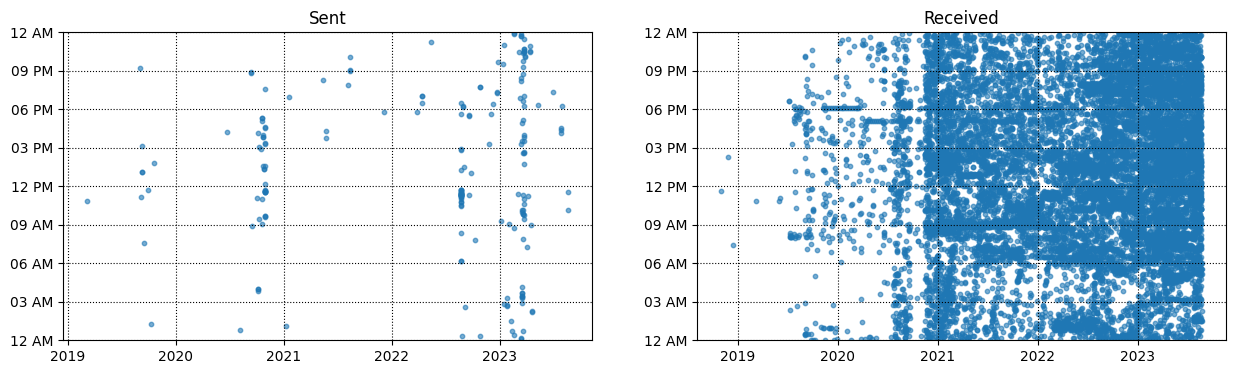

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

### Average emails per day and hour
- "What is the average number of emails per day?"
- "What is the average number of emails per hour?"

In [32]:
# creates a function that plots the average number of emails per day
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [33]:
# creates a function that plots the average number of emails per hour
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False, weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights)
        x = np.delete(xedges, -1) + 0.5 * (xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs)
    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()])
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()])

In [34]:
# create a class that plots the time of the day versus year for all the emails within the given timeframe:
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6, 6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False);
    def plot(self, df, color='darkblue', alpha=0.8, markersize=10, yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')

<ipython-input-30-ea344d3909ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-33-5969033e545a>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


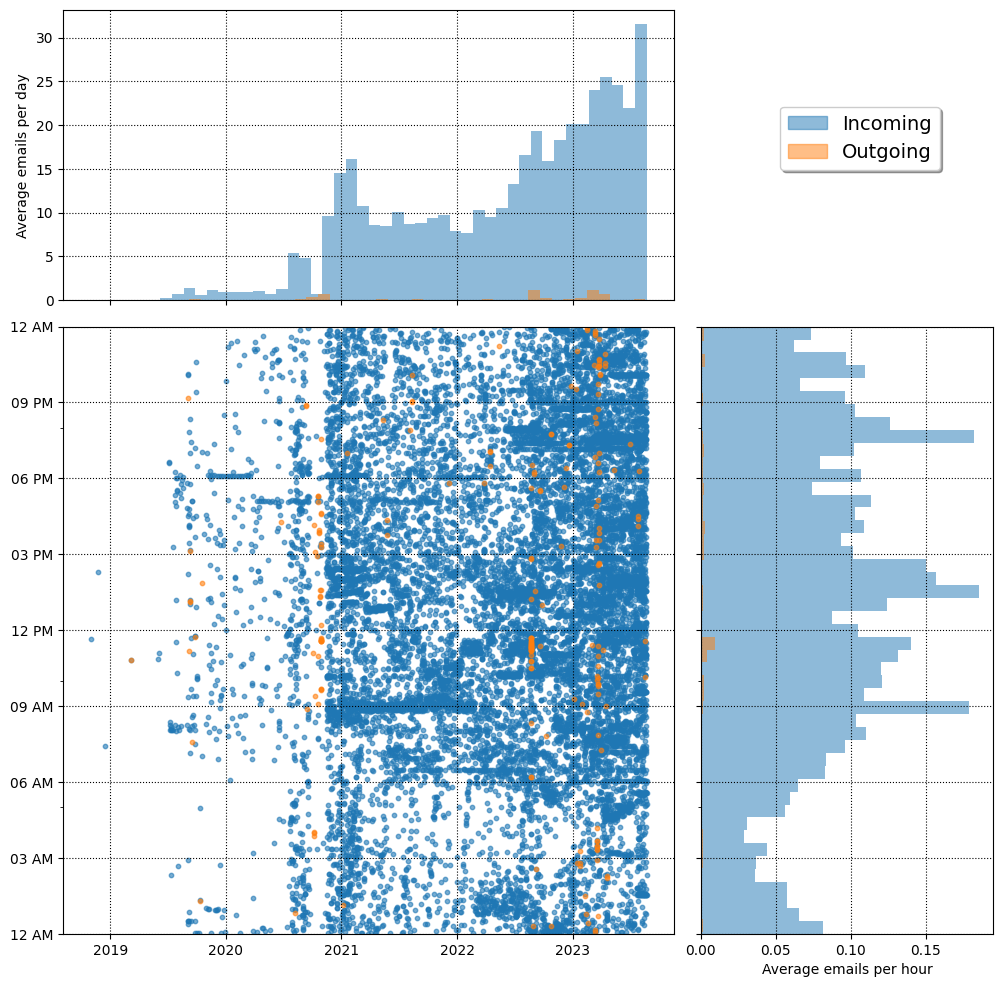

In [35]:
# instantiate the class to plot the graph:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

## Number of emails per day
- The busiest day of the week in terms of emails. "What are the most active emailing days?"

<Axes: >

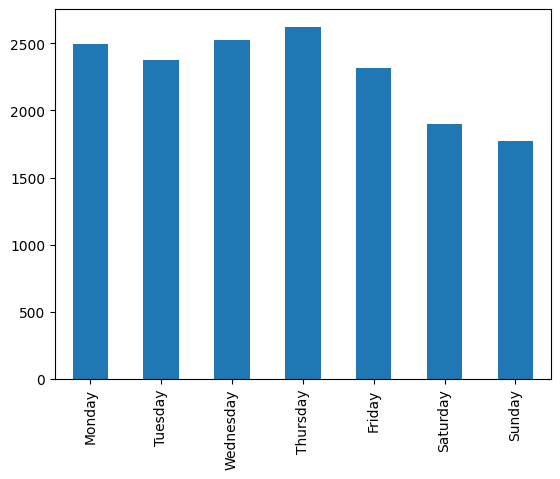

In [36]:
counts = zen.weekday.value_counts(sort=False)
counts.plot(kind='bar')

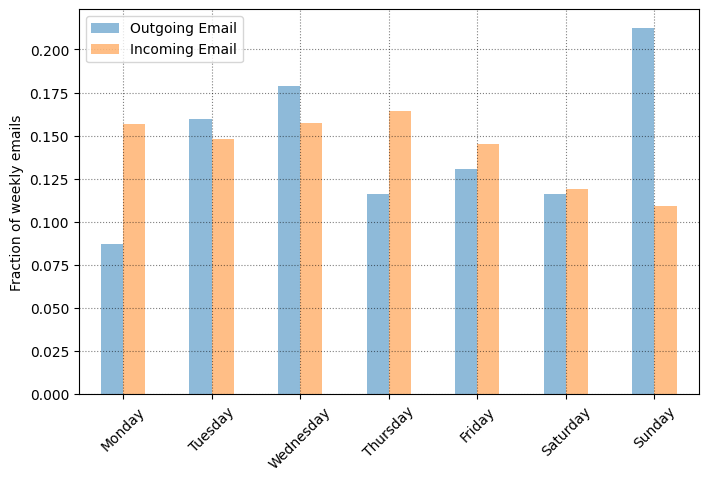

In [37]:
sent_day = sent.groupby('weekday').size() / len(sent)
received_day = received.groupby('weekday').size() / len(received)

most_active_df = pd.DataFrame(data={'Outgoing Email': sent_day, 'Incoming Email':received_day})
most_active_df.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

- The most active time of day for email communication

<ipython-input-33-5969033e545a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


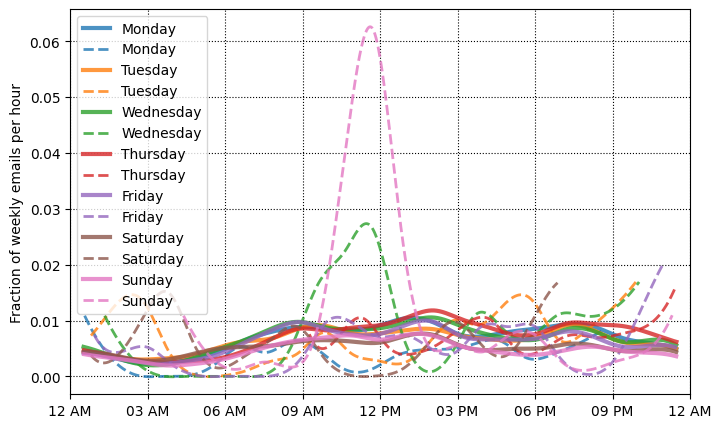

In [38]:

import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(zen.weekday.cat.categories):
    df_r = received[received['weekday']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=3, label=dow, weight_fun=wfun)
    df_s = sent[sent['weekday']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

## Most frequently used words

In [39]:
# remove the archived emails
from wordcloud import WordCloud
df_no_arxiv = zen[zen['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

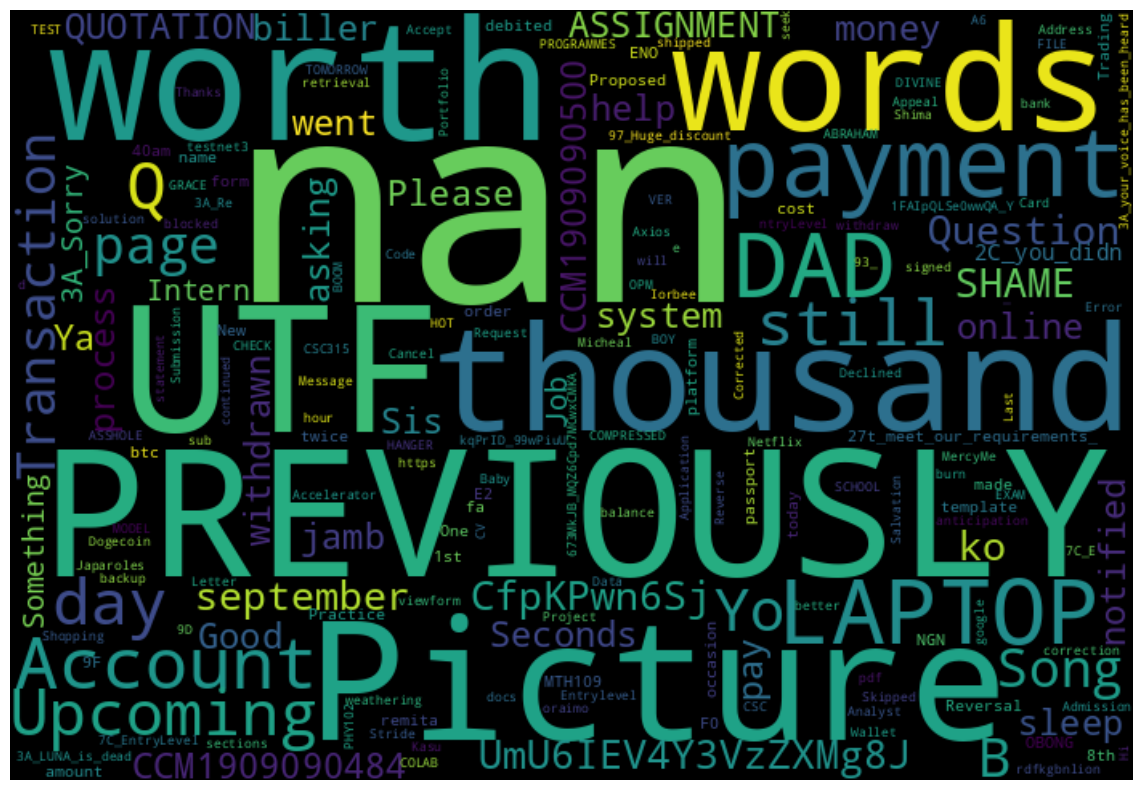

In [40]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

In [41]:
#from_zen = zen[zen['from'].value_counts().index, zen['from'].value_counts()]
#from_zen

#from_zen = zen[zen['from'], zen['from'].isin(zen['from'].value_counts().index)]
#from_zen


#from_zen = zen[zen['from'].isin(zen['from'].value_counts().index)]
#from_zen

#from_zen = zen[zen['from'].value_counts().index]
#from_zen

# Proportion of missing values by column
def email_who(zen):
    most_email = {}
    for col in zen.columns:
        most_email[col] = [zen["from"], zen['from'].value_counts().index]
    return most_email

# Apply the missing value method
null_dict = email_who(zen)
print(null_dict.items())

dict_items([('subject', [date
2023-08-21 13:54:11+01:00              no-reply@hackerrankmail.com
2023-08-20 18:43:15+01:00           encompasswellnigeria@gmail.com
2023-08-20 13:55:32+01:00           jobalerts-noreply@linkedin.com
2023-08-20 16:37:23+01:00                   Promo@promo.newegg.com
2023-08-20 15:41:30+01:00                       noreply@gtbank.com
                                             ...                  
2023-08-19 01:44:57+01:00                       hello@duolingo.com
2023-08-09 22:37:17+01:00              Coursera@email.coursera.org
2023-05-23 08:34:30+01:00    english-personalized-digest@quora.com
2023-08-18 16:50:31+01:00          fredrickhqblvditxwlfr@gmail.com
2023-06-11 07:57:14+01:00    english-personalized-digest@quora.com
Name: from, Length: 16007, dtype: object, Index(['info@twitter.com', 'noreply@freebitco.in', 'Promo@promo.newegg.com',
       'alerts@japanesepod101.com', 'do-not-reply@webtoon.com',
       'no-reply@email.jumia.com.ng', 'GeNS@gtbank

In [42]:
# Create a dataframe of the missing value information
df_missing = pd.DataFrame.from_dict(null_dict, orient = column, columns=['missing', 'miss_percent'])
df_missing

NameError: ignored

In [47]:

# Count the occurrences of each sender's email address
sender_counts = zen['from'].value_counts()

# Find the sender with the most emails sent
most_frequent_sender = sender_counts.idxmax()

# Print the email address of the most frequent sender
print("Most emails received is from:", most_frequent_sender)


Most emails received is from: info@twitter.com


In [48]:

# Count the occurrences of each sender's email address
sender_counts = zen['from'].value_counts()

# Find the sender with the most emails sent
most_frequent_sender = sender_counts.idxmin()

# Print the email address of the most frequent sender
print("Least emails received is from:", most_frequent_sender)


Least emails received is from: buyer-info13.g@mail.aliexpress.com


In [45]:

# Count the occurrences of each sender's email address
sender_counts = zen['label'] == 'Sent'
sender_counts.value_counts()
# Find the sender with the most emails sent
most_frequent_sender = sender_counts.idxmax()

# Print the email address of the most frequent sender
print("The person you sent the most emails to is:", most_frequent_sender)

The person you sent the most emails to is: 2023-08-21 13:54:11+01:00
